In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import string
import time
import math
from scipy import sparse
import matplotlib.pyplot as plt
import unidecode
import re

In [2]:
# preprocessing libraries from nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from numpy import linalg as LNG 
from sklearn.metrics import rand_score

In [346]:
#data_loc= "C:\Users\pavan\OneDrive\Desktop\Assignments\information retreival- 7071"
categories=[]
text_data=[]
os.chdir(r"C:\Users\pavan\OneDrive\Desktop\Assignments\information retreival- 7071")
bbc_directory=os.getcwd()+'/bbc'
for category_type in os.listdir(bbc_directory):
    each_category=os.path.join(bbc_directory,category_type)
    os.chdir(each_category)
    contents=''
    for each_file in os.listdir(each_category):
        categories.append(category_type)
        #splitlines()=split("\n")
        contents=open(each_file).read().splitlines()
        # Removing spaces("\n or ' '")- it makes text clean
        strn=''
        for i in contents:
            if len(i)>0:
                strn+=i+" "
#         if len(strn)>1000:
#             contents=strn[:1000]
#         else:
#             contents=strn
        contents=strn
        text_data.append(contents)

df=pd.DataFrame({'category':categories,'text_data':text_data})

In [347]:
df.head()

,category,text_data
0,business,Ad sales boost Time Warner profit Quarterly pr...
1,business,Dollar gains on Greenspan speech The dollar ha...
2,business,Yukos unit buyer faces loan claim The owners o...
3,business,High fuel prices hit BA's profits British Airw...
4,business,Pernod takeover talk lifts Domecq Shares in UK...


In [348]:
df['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [349]:
df.describe()

,category,text_data
count,2225,2225
unique,5,2125
top,sport,Ray DVD beats box office takings Oscar-nominat...
freq,511,2


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   2225 non-null   object
 1   text_data  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


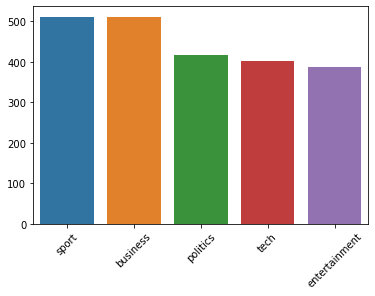

In [351]:
sns.barplot(x=df['category'].value_counts().index,y=df['category'].value_counts().values)
plt.xticks(rotation=45);

In [352]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(np.array(df['category']))

# Text Preprocessing
1. Convert text to lower case
2. Removing Punctuations
3. Removing white Spaces
4. Tokenization
5. Stop words removal
6. Stemming or lemmitization

In [354]:
def text_preprocessing(text):
    #set stopwords for english language
    clean_text=[]
    stop_words = stopwords.words('english')
    stemmer=PorterStemmer()
    text=unidecode.unidecode(text)
    regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags = re.UNICODE)
    text=regex_pattern.sub(r'', text)
    # covert text to lower case
    text=text.lower()
    # Remove all punctuations from text
    text=text.translate(str.maketrans('', '', string.punctuation))
    #Tokenization
    words=word_tokenize(text)
    for word in words:
        if ((word not in stop_words) and len(word)>1):
            stem_word=stemmer.stem(word)
            clean_text.append(stem_word)
    return clean_text
df['clean_data']=df['text_data'].apply(text_preprocessing)

In [355]:
df.head()

,category,text_data,label,clean_data
0,business,Ad sales boost Time Warner profit Quarterly pr...,0,"[ad, sale, boost, time, warner, profit, quarte..."
1,business,Dollar gains on Greenspan speech The dollar ha...,0,"[dollar, gain, greenspan, speech, dollar, hit,..."
2,business,Yukos unit buyer faces loan claim The owners o...,0,"[yuko, unit, buyer, face, loan, claim, owner, ..."
3,business,High fuel prices hit BA's profits British Airw...,0,"[high, fuel, price, hit, ba, profit, british, ..."
4,business,Pernod takeover talk lifts Domecq Shares in UK...,0,"[pernod, takeov, talk, lift, domecq, share, uk..."


In [356]:
#Each term frequency with their respective document
def tf_doc(df):
    tf_each_doc={}
    for i in range(df.shape[0]):
        tf_each_doc[i]={}
        text=df['clean_data'][i]
        words_in_doc=[]
        for word in text:
            if word not in words_in_doc:
                words_in_doc.append(word)
                tf_each_doc[i][word]=1
            else:
                tf_each_doc[i][word]+=1
    return tf_each_doc
tf_each_doc=tf_doc(df)

In [357]:
tf_each_doc

{0: {'ad': 1,
  'sale': 5,
  'boost': 2,
  'time': 3,
  'warner': 4,
  'profit': 10,
  'quarterli': 1,
  'us': 3,
  'media': 1,
  'giant': 1,
  'timewarn': 7,
  'jump': 1,
  '76': 1,
  '113bn': 1,
  'aps600m': 1,
  'three': 2,
  'month': 1,
  'decemb': 1,
  '639m': 1,
  'yearearli': 2,
  'firm': 1,
  'one': 1,
  'biggest': 1,
  'investor': 1,
  'googl': 2,
  'benefit': 1,
  'highspe': 2,
  'internet': 4,
  'connect': 1,
  'higher': 2,
  'advert': 1,
  'said': 5,
  'fourth': 3,
  'quarter': 4,
  'rose': 2,
  '111bn': 1,
  '109bn': 1,
  'buoy': 1,
  'oneoff': 1,
  'gain': 1,
  'offset': 1,
  'dip': 1,
  'bro': 1,
  'less': 1,
  'user': 1,
  'aol': 7,
  'friday': 1,
  'own': 1,
  'searchengin': 1,
  'busi': 1,
  'mix': 1,
  'fortun': 1,
  'lost': 1,
  '464000': 1,
  'subscrib': 2,
  'lower': 1,
  'preced': 1,
  'howev': 1,
  'compani': 2,
  'underli': 1,
  'except': 1,
  'item': 1,
  'back': 1,
  'stronger': 1,
  'advertis': 2,
  'revenu': 4,
  'hope': 1,
  'increas': 1,
  'offer': 2,
  '

In [358]:
def term_doc_func(df,tf_each_doc):    
    term_doc={}
    all_words=[]
    for i in range(df.shape[0]):
        words=tf_each_doc[i].keys()
        for word in words:
            if word not in all_words:
                term_doc[word]=[i]
                all_words.append(word)
            else:
                term_doc[word].append(i)
    return all_words,term_doc
all_words,term_doc=term_doc_func(df,tf_each_doc)

In [359]:
all_words=sorted(all_words)
vector_model=[]
#Calculate vector for each document 
for i in range(df.shape[0]):
    #each document vector
    doc_vector=[]
    for word in all_words:
        # If word is not in document, then tf-idf value=0
        tf_idf_value=0
        if word in tf_each_doc[i].keys():
            tf_value=tf_each_doc[i][word]
            idf_value=math.log((df.shape[0]+1)/(len(term_doc[word])+1))+1
            tf_idf_value=tf_value*idf_value

        doc_vector.append(tf_idf_value)
    #l2 normalization before applying kmeans clustering
    l2norm=LNG.norm(doc_vector)
    vector_model.append(doc_vector/l2norm)

In [360]:
X2=np.array(vector_model)
X2=sparse.csr_matrix(X2)

In [361]:
from sklearn import metrics
def purity_score(y_true,y_pred,**kwargs):
    #compute Confusion matrix
    contingency_matrix = metrics.cluster.contingency_matrix(y_true,y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix) 
purity=metrics.make_scorer(purity_score,greater_is_better=True)

In [362]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
params={
    'max_iter':[300,400,500]
}
#Number of Clusters
K = 5
model = KMeans(n_clusters=K)
grid_search=GridSearchCV(model,param_grid=params,cv=6,scoring=purity)
grid_search.fit(X2,df['label'])

GridSearchCV(cv=6, estimator=KMeans(n_clusters=5),
             param_grid={'max_iter': [300, 400, 500]},
             scoring=make_scorer(purity_score))

In [363]:
model2=grid_search.best_estimator_.fit(X2)
df['predict']=model2.labels_
df.groupby(['category','predict'])['predict'].count()

category       predict
business       0            2
               1            4
               2            1
               3          497
               4            6
entertainment  0          360
               3           25
               4            1
politics       1          272
               2            3
               3          139
               4            3
sport          2          510
               3            1
tech           0           14
               2           17
               3           14
               4          356
Name: predict, dtype: int64

In [364]:
grid_search.best_score_

0.8997814526116413

In [366]:
rand_score(model2.labels_,df['label'])

0.9233922075822488

In [367]:
#compute Confusion matrix
contingency_matrix = metrics.cluster.contingency_matrix(df['label'],model2.labels_)
k_values=np.argmax(contingency_matrix, axis=1)
#mapping class with respect to max count value
mapp=pd.DataFrame({'class':le.classes_,'k_value':k_values})
mapp

,class,k_value
0,business,3
1,entertainment,0
2,politics,1
3,sport,2
4,tech,4


In [368]:
from sklearn.decomposition import PCA
pca_results=PCA(n_components=2)
qqq=pca_results.fit_transform(X2.toarray())
qqq=pd.DataFrame(qqq)

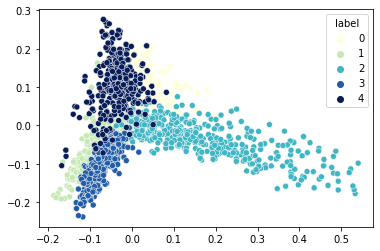

In [369]:
import seaborn as sns
sns.scatterplot(x=qqq[0].values,y=qqq[1].values,hue=df['label'],palette="YlGnBu");

In [370]:
X2.shape

(2225, 24455)

In [373]:
test_input=input("Enter the text:\n")
test_input=text_preprocessing(test_input)
query_dict={}
for word in test_input:
    if word not in query_dict.keys():
        query_dict[word]=1
    else:
        query_dict[word]+=1
test_vector=[]
for word in all_words:
    score=0
    if word in query_dict.keys():
        tf_value=query_dict[word]
        idf_value=math.log((df.shape[0]+1)/(len(term_doc[word])+1))+1
        score=tf_value*idf_value
    test_vector.append(score)
test_predict=model2.predict([test_vector])
print("prediction: ",mapp[mapp['k_value']==test_predict[0]]['class'].values)

Enter the text:
The inflation rate is forecast to hit a 42-year high of 13.3% this year, while the UK economy is expected to shrink for more than a year.  The Bank said the main reason for high inflation and low growth was rising energy bills, driven by Russia's invasion of Ukraine.
prediction:  ['business']


# Direct using tfidfvectorization

In [374]:
# Preprocessing function
def preprocessing(text):
    stop_words = stopwords.words('english')
    stemmer=PorterStemmer()
    text=unidecode.unidecode(text)
    each_document=text
    #lower case the text
    each_document=each_document.lower()
    #Removing Punctuations
    each_document=each_document.translate(str.maketrans('', '', string.punctuation))
    #Tokenization
    each_document=word_tokenize(each_document)
    #doc_list=[]
    temp=''
    for each_word in each_document:
        if ((each_word not in stop_words) and (len(each_word)>1)):
            each_word=stemmer.stem(each_word)
            #doc_list.append(each_word)
            temp+=each_word+" "
    return temp
start=time.time()
df['clean_data']=df['text_data'].apply(preprocessing)
end=time.time()
print("Time taken for pre-processing:",end-start)

Time taken for pre-processing: 39.81126356124878


In [375]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_data'].values)

In [376]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
params={
    'max_iter':[300,400,500]
}
#Number of Clusters
K = 5
model = KMeans(n_clusters=K)
grid_search=GridSearchCV(model,param_grid=params,cv=6,scoring=purity)
grid_search.fit(X2,df['label'])
#print(model.labels_)

GridSearchCV(cv=6, estimator=KMeans(n_clusters=5),
             param_grid={'max_iter': [300, 400, 500]},
             scoring=make_scorer(purity_score))

In [377]:
model2=grid_search.best_estimator_.fit(X)
df['predict']=model2.labels_
df.groupby(['category','predict'])['predict'].count()

category       predict
business       1            2
               2            8
               3          496
               4            4
entertainment  0            2
               1          353
               2            5
               3           26
politics       0            3
               2            3
               3          134
               4          277
sport          0          508
               1            2
               3            1
tech           0           17
               1            6
               2          356
               3           22
Name: predict, dtype: int64

In [378]:
grid_search.best_score_

0.9096743643913454

# Rand Index

In [379]:
rand_score(model2.labels_,df['label'])

0.9206814323821841

In [380]:
#compute Confusion matrix
contingency_matrix = metrics.cluster.contingency_matrix(df['label'],model2.labels_)
k_values=np.argmax(contingency_matrix, axis=1)
#mapping class with respect to max count value
mapp=pd.DataFrame({'class':le.classes_,'k_value':k_values})
mapp

,class,k_value
0,business,3
1,entertainment,1
2,politics,4
3,sport,0
4,tech,2


# Predict (test the model)

In [381]:
test_input=input("Enter the text:\n")
test_input=preprocessing(test_input)
test_vector=vectorizer.transform(np.array([test_input]))
test_predict=model2.predict(test_vector)
print("prediction: ",mapp[mapp['k_value']==test_predict[0]]['class'].values)

Enter the text:
The Bank's governor, Andrew Bailey, told BBC Radio 4's Today programme: "The real risk we're responding to is that inflation becomes embedded and it doesn't come down in the way that we would otherwise expect."
prediction:  ['business']


In [382]:
# If possible, include contradictions in pre-processing steps.
# Calculate purity and other evaluation metrics
# If possible, do hierarical(DBSCAN) and bisectingkmeans

# AgglomerativeClustering

In [234]:
# Additionally 
from sklearn.cluster import AgglomerativeClustering
ag_clustering=AgglomerativeClustering(n_clusters=5)
ag_clustering.fit_predict(X.toarray())

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [235]:
df['predict']=ag_clustering.labels_
df.groupby(['category','predict'])['predict'].count()

category       predict
business       0          486
               1           17
               2            3
               3            2
               4            2
entertainment  0           54
               1           14
               2            1
               4          317
politics       0          289
               1            7
               2           10
               3          105
               4            6
sport          0           10
               2          499
               4            2
tech           0           43
               1          346
               2            3
               4            9
Name: predict, dtype: int64

In [236]:
#compute Confusion matrix
contingency_matrix = metrics.cluster.contingency_matrix(df['label'],ag_clustering.labels_)
n_values=np.argmax(contingency_matrix, axis=1)
#mapping class with respect to max count value
mapp=pd.DataFrame({'class':le.classes_,'n_value':n_values})
mapp

,class,n_value
0,business,0
1,entertainment,4
2,politics,0
3,sport,2
4,tech,1


In [237]:
rand_score(ag_clustering.labels_,df['label'])

0.8565803087866786

In [256]:
qqq[1].values

array([ 0.11800648,  0.12646184,  0.0771278 , ...,  0.08513275,
        0.05726503, -0.06070373])

In [296]:
df.head()

,category,text_data,label,clean_data,predict
0,business,Ad sales boost Time Warner profit Quarterly pr...,0,ad sale boost time warner profit quarterli pro...,1
1,business,Dollar gains on Greenspan speech The dollar ha...,0,dollar gain greenspan speech dollar hit highes...,1
2,business,Yukos unit buyer faces loan claim The owners o...,0,yuko unit buyer face loan claim owner embattl ...,1
3,business,High fuel prices hit BA's profits British Airw...,0,high fuel price hit ba profit british airway b...,1
4,business,Pernod takeover talk lifts Domecq Shares in UK...,0,pernod takeov talk lift domecq share uk drink ...,2
